In [1]:
# Importing libraries
import pandas as pd
from sklearn.datasets import load_iris 

In [2]:
ds = load_iris()

In [3]:
# Basic features
dir(ds)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
ds.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = ds.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# Seperating 3 different classes into 3 dataframes for plotting
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

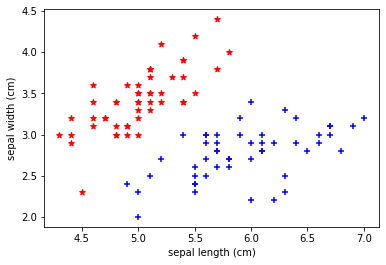

In [10]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

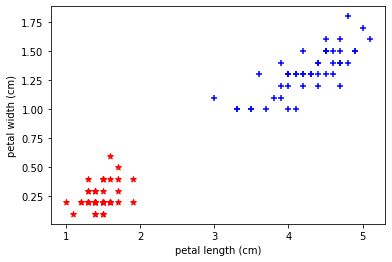

In [11]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Plot w.r.t petal length and petal width has clearer distinctions. The SVM will perform well in this case. When training my model I used all four features and classification will be between 3 classes

In [12]:
# Training our model
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
# Importing SVM (SVC for classification)
from sklearn.svm import SVC
model = SVC(C=5)

In [14]:
model.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
model.score(X_test, y_test)

1.0